In [1]:
# Support Vector Machines (SVMs)

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_dataset_1_svm.csv")
data.sample (5)

,id,unit of measure (per pack),line item quantity,line item value,pack price,unit price,line item insurance (usd)
1215,11021,30,50000,600500.00,12.01,0.40,960.80
1829,12009,240,6000,11520.00,1.92,0.01,22.58
2567,15825,20,400,12800.00,32.00,1.60,15.07
8285,84677,30,72974,315247.68,4.32,0.14,520.16
699,8271,25,232,4640.00,20.00,0.80,7.42


In [4]:
# Perform simple feature engineering to create a 'total price' feature
data['total price'] = data['pack price'] * data['unit price']
print(data.head(10))


      id  unit of measure (per pack)  line item quantity  line item value  \
0     69                         100                1500         120000.0   
1  81483                          60                 525           3465.0   
2     92                         100                1000          80000.0   
3    108                          60                5513         140581.5   
4    115                         240                1000           1920.0   
5    116                         120                 500          41095.0   
6    130                         100                 750          53992.5   
7    134                         100                  25           8750.0   
8    138                          25               10000         200000.0   
9    139                          25               10000         200000.0   

   pack price  unit price  line item insurance (usd)  total price  
0       80.00        0.80                     192.00      64.0000  
1        6.60   

In [5]:
from sklearn.svm import OneClassSVM 
# OneClassSVM: Used for anomaly detection by identifying data points outside the "normal" region.

model = OneClassSVM(nu=0.015)  #proportion of outliers expected in the dataset.
model.fit(data)


OneClassSVM(nu=0.015)

In [6]:
# Predict anomalies
predictions = model.predict(data)

anomalies = data[predictions == -1] # Identify anomalies in the dataset
print(anomalies)


          id  unit of measure (per pack)  line item quantity  line item value  \
13       262                         200                  40           317.60   
16       284                         100                1500            15.00   
17       305                         100                 650             6.50   
18       343                         200                 200           340.00   
19       361                         100                   2           278.00   
...      ...                         ...                 ...              ...   
9996   86757                          60              306992       2369978.24   
9998   86772                          30              296996       1369151.56   
10016  86800                          30              200000       1920000.00   
10018  86802                          60              300000       2316000.00   
10034  86821                          30              514526       5140114.74   

       pack price  unit pri

In [7]:
anomaly_count = len(predictions[predictions == -1])

print(f"Number of anomalies: {anomaly_count}")

Number of anomalies: 151


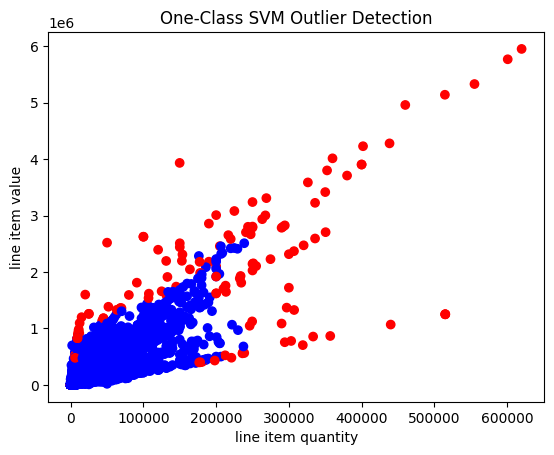

In [8]:
import matplotlib.pyplot as plt

# Define colors for anomalies and inliers
anomaly_color = 'red'
inlier_color = 'blue'

# Create a list of colors based on the predictions
colors = [anomaly_color if prediction == -1 else inlier_color for prediction in predictions]

# Visualize outliers with red and inliers with blue
plt.scatter(data['line item quantity'], data['line item value'], c=colors)
plt.xlabel('line item quantity')
plt.ylabel('line item value')
plt.title('One-Class SVM Outlier Detection')
plt.show()



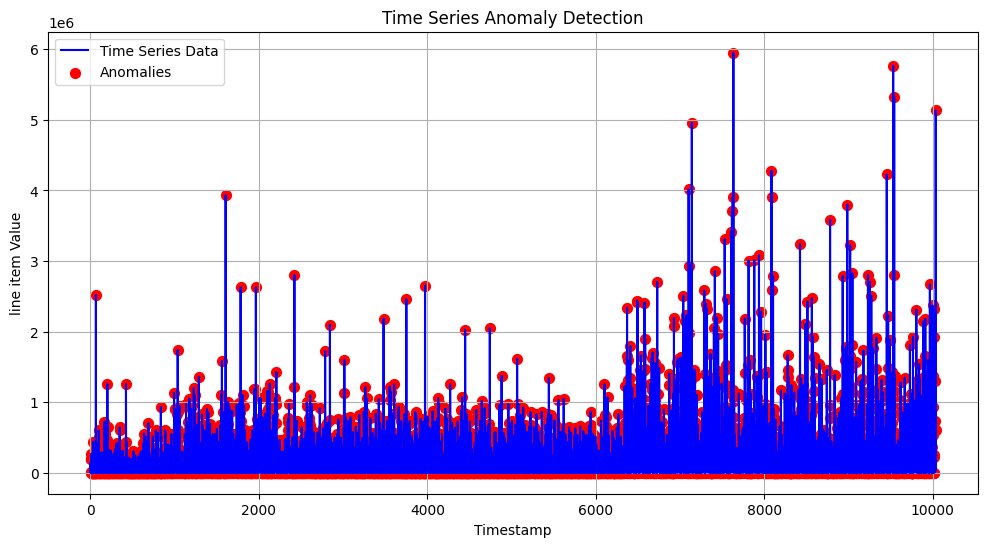

In [9]:
time_series = data['line item value']

# One-Class SVM model with default parameters
svm_model = OneClassSVM()

# Fit the model to the time series data
svm_model.fit(time_series.values.reshape(-1, 1))  #2D array-like input

anomaly_predictions = svm_model.predict(time_series.values.reshape(-1, 1))

# Create a time series plot with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Time Series Data', color='blue')
plt.scatter(time_series.index[anomaly_predictions == -1], time_series[anomaly_predictions == -1], c='red', label='Anomalies', s=50)
plt.title('Time Series Anomaly Detection')
plt.xlabel('Timestamp')
plt.ylabel('line item Value')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming no ground truth is available, and all instances are normal
y_true = np.ones(len(data))

# Update predictions to classify all instances as anomalies
y_pred_all_anomalies = -1 * np.ones(len(data))

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_all_anomalies, pos_label=-1, zero_division=1)
recall = recall_score(y_true, y_pred_all_anomalies, pos_label=-1, zero_division=1)
f1 = f1_score(y_true, y_pred_all_anomalies, pos_label=-1, zero_division=1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_all_anomalies)
print("Confusion Matrix:")
print(conf_matrix)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[    0     0]
 [10037     0]]
Precision: 0.0
Recall: 1.0
F1 Score: 0.0
